# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json('data/world_bank_projects.json')
df2=json.load(open('data/world_bank_projects.json'))

1. Find the 10 countries with most projects

[("People's Republic of China", 19), ('Republic of Indonesia', 19), ('Socialist Republic of Vietnam', 17), ('Republic of India', 16), ('Republic of Yemen', 13), ('Kingdom of Morocco', 12), ('Nepal', 12), ("People's Republic of Bangladesh", 12), ('Republic of Mozambique', 11), ('Africa', 11)]


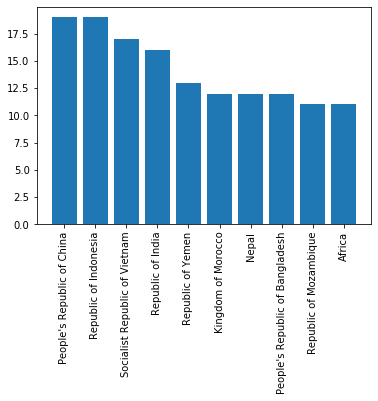

In [3]:
df_most_projects=Counter(df['countryname']).most_common(10)
print(df_most_projects)
x,y = zip(*df_most_projects)
plt.bar(x,y)
plt.xticks(x,x,rotation='vertical')
plt.show()

2. Find the top 10 major project themes (using column 'mjtheme_namecode')

[('Environment and natural resources management', 223), ('Rural development', 202), ('Human development', 197), ('Public sector governance', 184), ('Social protection and risk management', 158), ('Financial and private sector development', 130), ('', 122), ('Social dev/gender/inclusion', 119), ('Trade and integration', 72), ('Urban development', 47)]


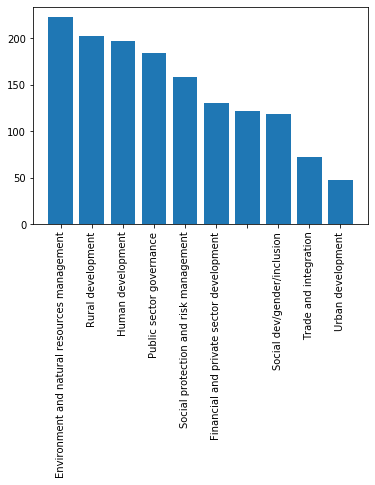

In [4]:
common_10 = Counter(json_normalize(df2, 'mjtheme_namecode')['name']).most_common(10)

print(common_10)

x,y = zip(*common_10)
plt.bar(x,y)
plt.xticks(x,x,rotation='vertical')
plt.show()

[('Environment and natural resources management', 223), ('Rural development', 202), ('Human development', 197), ('Public sector governance', 184), ('Social protection and risk management', 158), ('Financial and private sector development', 130), ('', 122), ('Social dev/gender/inclusion', 119), ('Trade and integration', 72), ('Urban development', 47)]


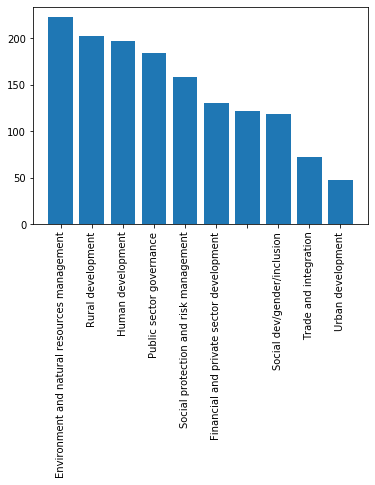

In [5]:
#Alternate

themes=df['mjtheme_namecode']
projects=[]
for items in themes:
    for thing in items:
        projects.append(thing['name'])

common_10_2 = Counter(projects).most_common(10)

print(common_10_2)

x,y = zip(*common_10_2)
plt.bar(x,y)
plt.xticks(x,x,rotation='vertical')
plt.show()

3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

     code                 name
458     1  Economic management
1235    1  Economic management
1230    1  Economic management
1229    1  Economic management
1218    1  Economic management
[('Environment and natural resources management', 250), ('Rural development', 216), ('Human development', 210), ('Public sector governance', 199), ('Social protection and risk management', 168), ('Financial and private sector development', 146), ('Social dev/gender/inclusion', 130), ('Trade and integration', 77), ('Urban development', 50), ('Economic management', 38)]


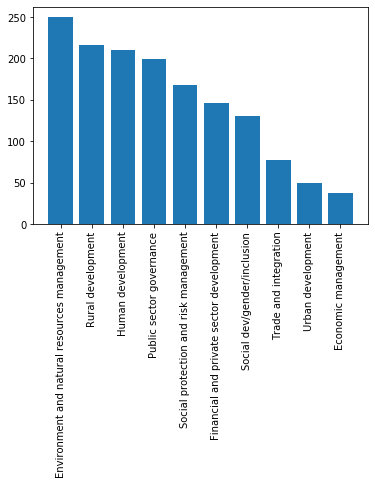

In [6]:
df2_fill=json_normalize(df2,'mjtheme_namecode').sort_values('code').replace(to_replace='',value=np.NaN).ffill()
print(df2_fill.head())

df2_fill_count = Counter(df2_fill['name']).most_common(10)
print(df2_fill_count)


x,y = zip(*df2_fill_count)
plt.bar(x,y)
plt.xticks(x,x,rotation='vertical')
plt.show()